# Training the algo

In [140]:
!pip install pandas-datareader
!pip install yfinance 
!pip install yahoofinancials

In [141]:
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import numpy as np
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
stocks= ['SBIN.NS','TATAPOWER.NS','ADANIPOWER.BO','INFY.BO','HCLTECH.NS','COALINDIA.NS']

data=web.DataReader(stocks,data_source='yahoo',start='04/01/2015',end='31/03/2017')['Adj Close']

In [179]:
data

Symbols,SBIN.NS,TATAPOWER.NS,ADANIPOWER.BO,INFY.BO,HCLTECH.NS,COALINDIA.NS
Date,,,,,,
2015-04-01,261.734772,64.117012,47.750000,457.418243,419.203461,227.381699
2015-04-06,262.883392,63.910187,47.400002,458.460571,415.282562,225.972336
2015-04-07,260.394714,64.861603,48.599998,455.101959,416.396515,225.251968
2015-04-08,262.165466,63.992916,48.599998,463.430145,427.223541,238.249725
2015-04-09,268.817749,64.820236,49.400002,465.662201,429.585022,242.383926
...,...,...,...,...,...,...
2017-03-27,274.411957,74.720741,39.099998,453.868958,400.490417,212.345291
2017-03-28,277.014160,76.004601,39.900002,456.648193,404.132690,211.507584
2017-03-29,283.249695,77.031700,40.000000,454.993835,412.451233,214.239288


In [180]:
returns_portfolio=data.pct_change()
returns_portfolio.head()

Symbols,SBIN.NS,TATAPOWER.NS,ADANIPOWER.BO,INFY.BO,HCLTECH.NS,COALINDIA.NS
Date,,,,,,
2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-06,0.004388,-0.003226,-0.007330,0.002279,-0.009353,-0.006198
2015-04-07,-0.009467,0.014887,0.025316,-0.007326,0.002682,-0.003188
2015-04-08,0.006800,-0.013393,0.000000,0.018300,0.026002,0.057703
2015-04-09,0.025374,0.012928,0.016461,0.004816,0.005528,0.017352


In [181]:
# weight_portfolio_1=[0.2,0.4,0.1,0.1,0.1,0.1]
# portfolio_return=returns_portfolio.dot(weight_portfolio_1)
# portfolio_return.head()

In [182]:
mean_daily_returns = returns_portfolio.mean()
mean_daily_returns

Symbols
SBIN.NS          0.000421
TATAPOWER.NS     0.000534
ADANIPOWER.BO    0.000049
INFY.BO          0.000086
HCLTECH.NS       0.000104
COALINDIA.NS     0.000010
dtype: float64

In [183]:
variance_matrix=returns_portfolio.cov()

In [116]:
# portfolio_final_return=round(np.sum(mean_daily_returns * weight_portfolio) * 246,2)
# portfolio_final_return=round(mean_daily_returns*246,2)

In [117]:
# return_stdev = portfolio_return.std()
# volatility= round(return_stdev * np.sqrt(246),2)

In [118]:
# portfolio_variance=np.transpose(weight_portfolio)@variance_matrix@weight_portfolio
# # portfolio_volatility=np.sqrt(portfolio_variance)

In [119]:
# print("the portfolio variance is ",portfolio_variance)
# print("The portfolio volatility is",volatility)
# print("The portfolio return is",portfolio_final_return)

the portfolio variance is  0.05813982108019434
The portfolio volatility is 0.23
The portfolio return is -0.12


In [184]:
port_returns=[]
port_volatility=[]
port_weights=[]
num_assets=len(data.columns)
num_portfolios=50000
individual_rets = data.resample('Y').last().pct_change().mean()

In [185]:
for port in range(num_portfolios):
    weights=np.random.random(num_assets)
    weights=weights/np.sum(weights)
    port_weights.append(weights)
    returns=np.dot(weights,individual_rets)
    port_returns.append(returns)
    var=variance_matrix.mul(weights,axis=0).mul(weights,axis=1).sum().sum()
    sd=np.sqrt(var)
    ann_sd=sd*np.sqrt(493)
    port_volatility.append(ann_sd)

In [ ]:
# weight_portfolio=0
# portfolio_final_return=0
# portfolio_volatility=0


In [107]:
# results=np.zeros((4+len(stocks)-1,num_portfolios))

In [108]:
# for i in range(num_portfolios):
#     weight_portfolio=np.random.random(6)
#     weight_portfolio /= np.sum(weight_portfolio)
#     portfolio_final_return=np.sum(mean_daily_returns*weight_portfolio)*246
#     portfolio_volatility=np.sqrt(np.dot(weight_portfolio.T,np.dot(variance_matrix,weight_portfolio)))*np.sqrt(246)
#     results[0,i] = portfolio_final_return
#     results[1,i] = portfolio_volatility
#     results[2,i] = results[0,i] / results[1,i]
    
#     for j in range(len(weight_portfolio)):
#         results[j+3,i] = weight_portfolio[j]
# results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks[5]])
# max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
# min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
    

In [186]:
len(port_returns)

50000

In [187]:
data_final={'Returns':port_returns, 'Volatility':port_volatility}

for counter, symbol in enumerate(data.columns.tolist()):
    data_final[symbol+'weight']=[w[counter] for w in port_weights]

In [188]:
portfolios_V1 = pd.DataFrame(data_final)
portfolios_V1.head()

,Returns,Volatility,SBIN.NSweight,TATAPOWER.NSweight,ADANIPOWER.BOweight,INFY.BOweight,HCLTECH.NSweight,COALINDIA.NSweight
0,0.057747,0.244096,0.078971,0.214142,0.066529,0.258280,0.199427,0.182652
1,0.091630,0.304508,0.026280,0.278677,0.245602,0.006506,0.208148,0.234786
2,0.100914,0.329600,0.269288,0.116510,0.258762,0.007479,0.138286,0.209674
3,0.124060,0.313107,0.425425,0.356579,0.018857,0.120691,0.070825,0.007623
4,0.090928,0.329738,0.244054,0.105213,0.272196,0.112010,0.011304,0.255223


In [165]:
# results_frame

Text(0, 0.5, 'Expected Returns')

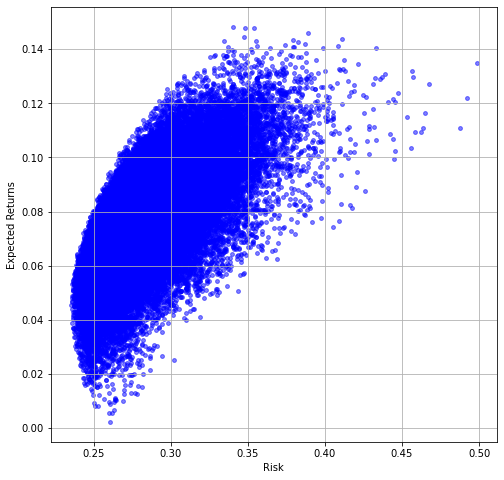

In [189]:
portfolios_V1.plot.scatter(x="Volatility", y='Returns', marker='o',color='b',s=15,alpha=0.5,grid=True,figsize=[8,8])
plt.xlabel("Risk")
plt.ylabel("Expected Returns")

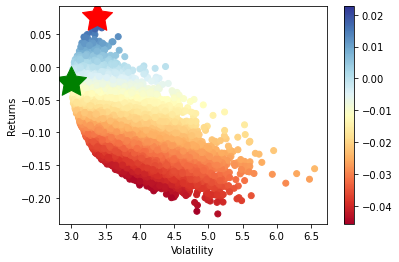

In [83]:
# plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
# plt.xlabel('Volatility')
# plt.ylabel('Returns')
# plt.colorbar()
# plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
# plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)


In [194]:
min_vol_port=portfolios_V1.iloc[portfolios_V1["Volatility"].idxmin()]
min_vol_port

Returns                0.045523
Volatility             0.235224
SBIN.NSweight          0.067572
TATAPOWER.NSweight     0.208383
ADANIPOWER.BOweight    0.000216
INFY.BOweight          0.296193
HCLTECH.NSweight       0.158488
COALINDIA.NSweight     0.269148
Name: 18821, dtype: float64

In [191]:
rf=0.01
optimal_risky_port=portfolios_V1.iloc[((portfolios_V1['Returns']-rf)/portfolios_V1['Volatility']).idxmax()]
optimal_risky_port

Returns                0.148288
Volatility             0.340566
SBIN.NSweight          0.346816
TATAPOWER.NSweight     0.549388
ADANIPOWER.BOweight    0.047925
INFY.BOweight          0.028400
HCLTECH.NSweight       0.011126
COALINDIA.NSweight     0.016346
Name: 36706, dtype: float64

Text(0, 0.5, 'Expected Returns')

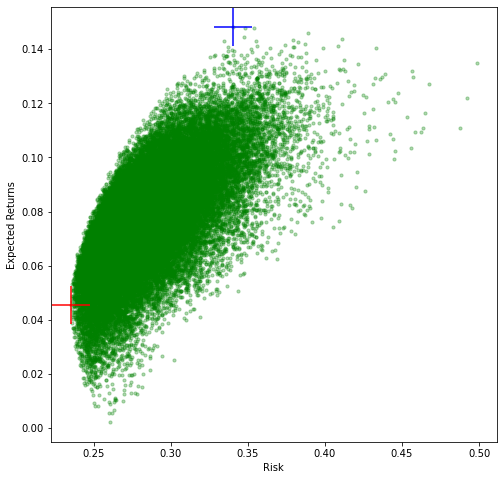

In [213]:
plt.subplots(figsize=(8,8))
plt.scatter(portfolios_V1["Volatility"],portfolios_V1["Returns"],marker='o',s=10,alpha=0.3,color='g')
plt.scatter(min_vol_port[1],min_vol_port[0],color='r',marker='+',s=1500)
plt.scatter(optimal_risky_port[1],optimal_risky_port[0],color='b',marker='+',s=1500)
plt.xlabel("Risk")
plt.ylabel("Expected Returns")

 # 1.) How did you choose the Stocks?
 
 ## In this I have choosen 6 stocks of which Tata Power and Adani Power are utilities stocks and it was mentioned in investopedia that the utilities stocks usually have beta <1
 ## Next SBI and Coal India are the stocks with beta = 1
 ## ANd finally the Infosys and HCL Technologies are the Technology based share and they usually have a Beta > 1

# 2.) What is the impact of increasing the number of stocks in the portfolio?

## On increasing the number of stocks the risk or the volitility decreases but the weight of a particular stock also decreases 

# 3.) Why are calculating the weights by optimization and not giving equal weightage to every stock?

## The reason is that all the stocks don't provide the same return with same risk so we need to divide our money in such a way that we can maximize profits with less risk

# 4.) Which optimization techniques are used by Mutual Funds currently?

## The Modern Portfolio Theory (MPT)

# 5.) Which parameters are you using to check the accuracy of your model?

## The Sharpe Factor and also the Jenson's Alpha

# Testing the algo for next year

In [201]:
stocks_test= ['SBIN.NS','TATAPOWER.NS','ADANIPOWER.BO','INFY.BO','HCLTECH.NS','COALINDIA.NS']

data_test=web.DataReader(stocks,data_source='yahoo',start='04/01/2017',end='31/03/2018')['Adj Close']
data_test.shape

(246, 6)

In [196]:
returns_portfolio_test=data.pct_change()
returns_portfolio_test.head()

Symbols,SBIN.NS,TATAPOWER.NS,ADANIPOWER.BO,INFY.BO,HCLTECH.NS,COALINDIA.NS
Date,,,,,,
2017-04-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-05,0.014327,-0.011211,0.031902,-0.013918,-0.018182,-0.016780
2017-04-06,-0.015134,-0.010204,0.052319,0.003767,0.003528,-0.012584
2017-04-07,-0.011610,0.002291,-0.014689,-0.017915,-0.004921,-0.008729
2017-04-10,-0.000346,-0.005143,0.017202,-0.028841,-0.019133,0.010039


In [197]:
mean_daily_returns_test = returns_portfolio_test.mean()
mean_daily_returns_test

Symbols
SBIN.NS         -0.000336
TATAPOWER.NS    -0.000314
ADANIPOWER.BO   -0.001707
INFY.BO          0.000697
HCLTECH.NS       0.000594
COALINDIA.NS     0.000167
dtype: float64

In [198]:
variance_matrix_test=returns_portfolio_test.cov()

In [200]:
port_returns_test=[]
port_volatility_test=[]
port_weights_test=[]
num_assets_test=len(data_test.columns)
num_portfolios_test=50000
individual_rets_test = data_test.resample('Y').last().pct_change().mean()

In [202]:
for port in range(num_portfolios_test):
    weights_test=np.random.random(num_assets_test)
    weights_test=weights_test/np.sum(weights_test)
    port_weights_test.append(weights_test)
    returns_test=np.dot(weights_test,individual_rets_test)
    port_returns_test.append(returns_test)
    var_test=variance_matrix_test.mul(weights_test,axis=0).mul(weights_test,axis=1).sum().sum()
    sd_test=np.sqrt(var_test)
    ann_sd_test=sd_test*np.sqrt(246)
    port_volatility_test.append(ann_sd_test)

In [203]:
data_final_test={'Returns':port_returns_test, 'Volatility':port_volatility_test}

for counter, symbol in enumerate(data_test.columns.tolist()):
    data_final_test[symbol+'weight']=[w[counter] for w in port_weights_test]

In [204]:
portfolios_V1_test = pd.DataFrame(data_final_test)
portfolios_V1_test.head()

,Returns,Volatility,SBIN.NSweight,TATAPOWER.NSweight,ADANIPOWER.BOweight,INFY.BOweight,HCLTECH.NSweight,COALINDIA.NSweight
0,-0.075498,0.171236,0.186632,0.092767,0.190920,0.128512,0.220359,0.180809
1,-0.148691,0.198562,0.186233,0.236300,0.251471,0.068545,0.205170,0.052282
2,-0.016897,0.144687,0.148188,0.160847,0.073927,0.238395,0.131393,0.247250
3,-0.065214,0.153011,0.201044,0.355630,0.028834,0.185662,0.156593,0.072236
4,-0.040861,0.153817,0.269085,0.185226,0.033305,0.067990,0.285959,0.158435


In [205]:
min_vol_port_test=portfolios_V1_test.iloc[portfolios_V1_test["Volatility"].idxmin()]
min_vol_port_test

Returns                0.032236
Volatility             0.127363
SBIN.NSweight          0.048080
TATAPOWER.NSweight     0.225869
ADANIPOWER.BOweight    0.002152
INFY.BOweight          0.125702
HCLTECH.NSweight       0.359352
COALINDIA.NSweight     0.238845
Name: 1719, dtype: float64

In [212]:
A=[0.048080,0.225869,0.002152,0.125702,0.359352,0.238845]
B=[0.067572,0.208383,0.000216,0.296193,0.158488,0.269148]


In [211]:
difference = []


zip_object = zip(A, B)
for A_i, B_i in zip_object:
    difference.append(A_i-B_i)


print(difference)

[-0.019491999999999995, 0.017485999999999974, 0.0019359999999999998, -0.17049099999999998, 0.20086400000000001, -0.030302999999999997]


## So from the above observation we can see that there is a 

### a.) 1.94% decrease in weight of SBI
### b.) 1.74% increase in weight of Tata Power
### c.) 0.193% increase in weight of Adani Power
### d.) 17.04% decrease in weight of Infosys
### e.) 20% increase in weight of HCL Technology
### f.) 3.02% decrease in weight of Coal India

### So from this we can conclude that all the shares except the Infosys and HCL shares have been almost the same except of some mere 1% or  2% difference but there is also a reason for the large difference in the Infosys and HCL shares and that is their Beta value they are technology shares andhave a huge beta so due to this there is a large difference in both of them